# labelled Env Testing

In [1]:
import gymnasium as gym
from rl_vcf.rl.automata.ltlf_to_dfa import ltlf_to_dfa

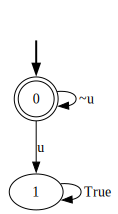

In [2]:
# Create automaton
ltlf_formula = "G ~u"
dfa = ltlf_to_dfa(ltlf_formula)
automaton_graph = dfa.automaton.to_graphviz()
automaton_graph

In [3]:
# Define labelling function
def cartpole_labelling_function(obs):
    x, x_dot, theta, theta_dot = obs
    labels = {}
    if abs(theta) > 0.5:
        labels["u"] = True  # unsafe
    else:
        labels["u"] = False  # safe
    return labels


labelling_function = cartpole_labelling_function

In [4]:
# Create labelled environment
env = gym.make("CartPole-v1")

In [23]:
env.reset()
dfa.reset()

dfa_state = next(iter(dfa.cur_state))

for _ in range(20):
    action = (
        env.action_space.sample()
    )  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)
    next_dfa_state = next(iter(dfa.step(labelling_function(observation))))
    if next_dfa_state != dfa_state:
        transition = True
    else:
        transition = False
    print(observation[2], next_dfa_state, transition)
    dfa_state = next_dfa_state

0.04241881 0 False
0.04888828 0 False
0.0614728 0 False
0.080210716 0 False
0.093493626 0 False
0.11311298 0 False
0.12749407 0 False
0.14839587 0 False
0.17589433 0 False
0.19853613 0 False
0.2280237 0 False
0.26446244 0 False
0.30798188 0 False
0.3587298 0 False
0.4057828 0 False
0.44954658 0 False
0.50104064 1 True
0.5603647 1 False
0.6276118 1 False
0.70285684 1 False
